In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

%matplotlib inline
plt.style.use('fivethirtyeight')
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (12, 9)


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [ ]:
df.shape

(54330, 8)

In [ ]:
df_test = pd.read_csv('/content/test_X.csv', sep=';')
df_test.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,32233784,17:50:09,MA,68169,PAID,1,61.63
1,32240990,18:38:08,ES,8220,PAID,11,15.99
2,33331821,22:11:59,IT,11169,PAID,4,5.89
3,33200505,22:13:55,AR,33371,PAID,3,7.85
4,32527480,12:01:04,TR,33958,PAID,2,4.75


In [ ]:
df_test.shape

(30, 7)

In [ ]:
# se categorizan las variables.
for col in df.columns:
  if len(df[col].unique()) < 25:
    df[col] = pd.Categorical(df[col])


In [ ]:
# creamos variable hora.
df['hora'] = df.local_time.str.slice(0,2)
# se convierte a numerico
df['hora']=[pd.to_numeric(n.replace(' ','')) for n in df['hora']]
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hora
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21


## Analisis exploratorio de datos (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order_id        54330 non-null  int64   
 1   local_time      54330 non-null  object  
 2   country_code    54330 non-null  category
 3   store_address   54330 non-null  int64   
 4   payment_status  54330 non-null  category
 5   n_of_products   54330 non-null  int64   
 6   products_total  54330 non-null  float64 
 7   final_status    54330 non-null  category
 8   hora            54330 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 2.6+ MB


In [ ]:
df.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
hora              0
dtype: int64

In [ ]:
df.describe()

,order_id,store_address,n_of_products,products_total,hora
count,5.433000e+04,54330.000000,54330.000000,54330.000000,54330.000000
mean,3.278267e+07,41609.384981,2.815792,9.838136,16.394699
std,4.459402e+05,21903.267141,2.430936,9.260352,4.336068
min,3.150378e+07,190.000000,1.000000,0.000000,0.000000
25%,3.240007e+07,21369.000000,1.000000,4.130000,13.000000
50%,3.278159e+07,45993.500000,2.000000,7.130000,17.000000
75%,3.318380e+07,62004.000000,3.000000,12.770000,20.000000
max,3.356085e+07,75236.000000,39.000000,221.480000,23.000000


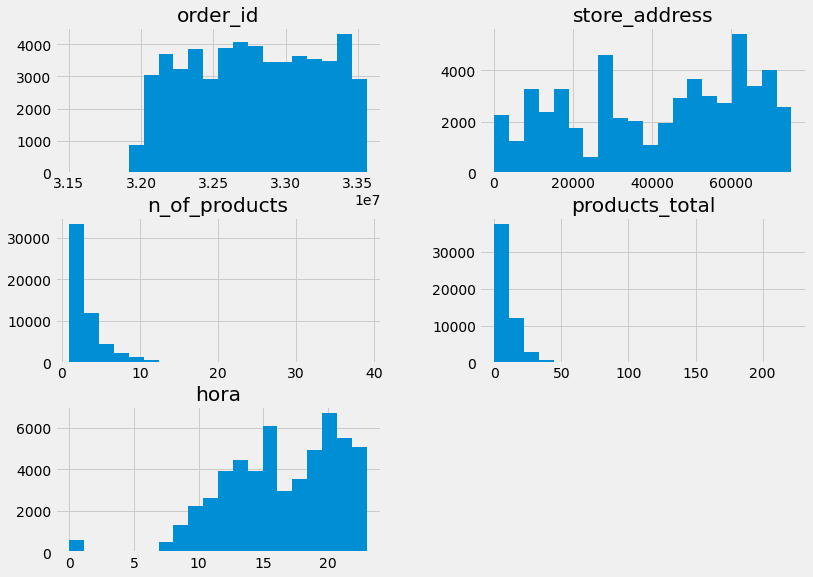

In [ ]:
_ = df.drop(columns='final_status').hist(bins=20)

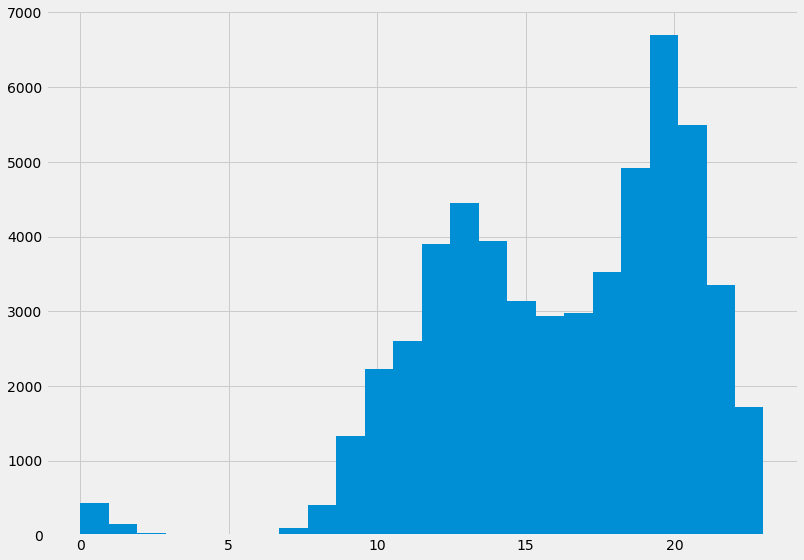

In [ ]:
df.hora.sort_values().hist(bins=24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order_id        54330 non-null  int64   
 1   local_time      54330 non-null  object  
 2   country_code    54330 non-null  category
 3   store_address   54330 non-null  int64   
 4   payment_status  54330 non-null  category
 5   n_of_products   54330 non-null  int64   
 6   products_total  54330 non-null  float64 
 7   final_status    54330 non-null  category
 8   hora            54330 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 2.6+ MB


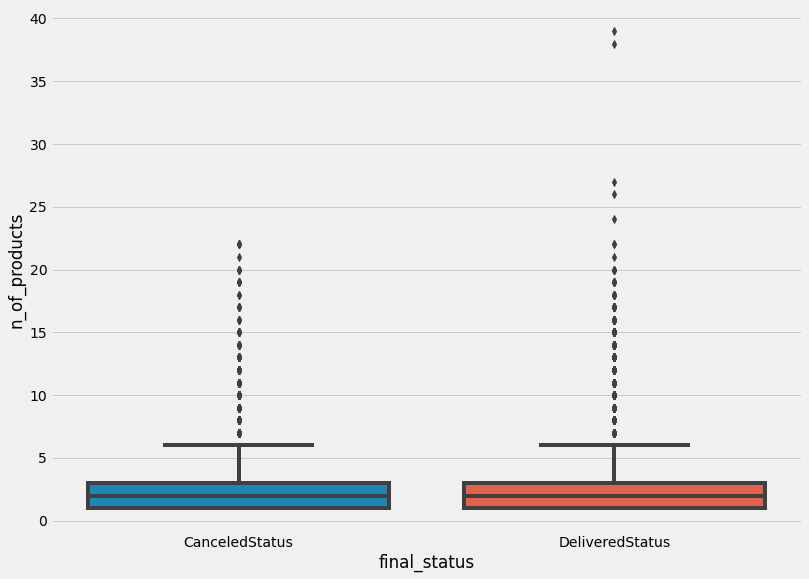

In [ ]:
_ = sns.boxplot(data=df,y='n_of_products', x='final_status')

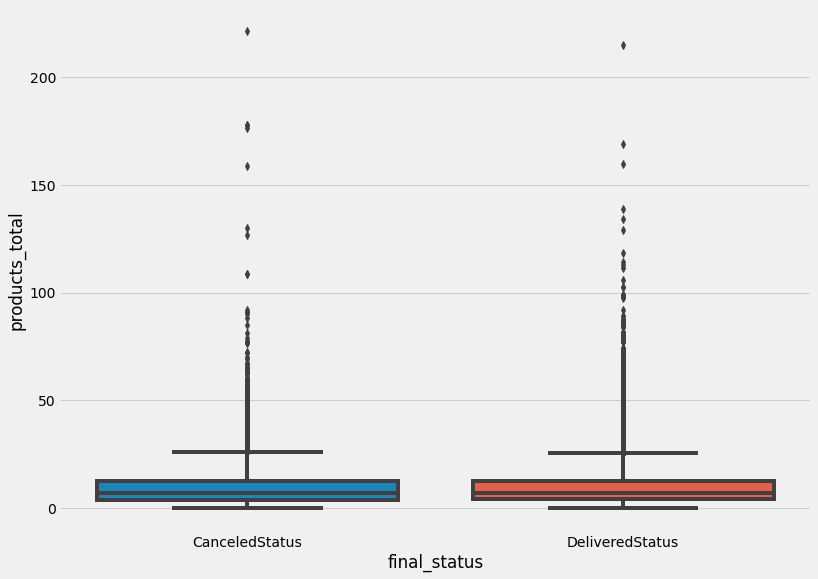

In [ ]:
_ = sns.boxplot(data=df,y='products_total', x='final_status')

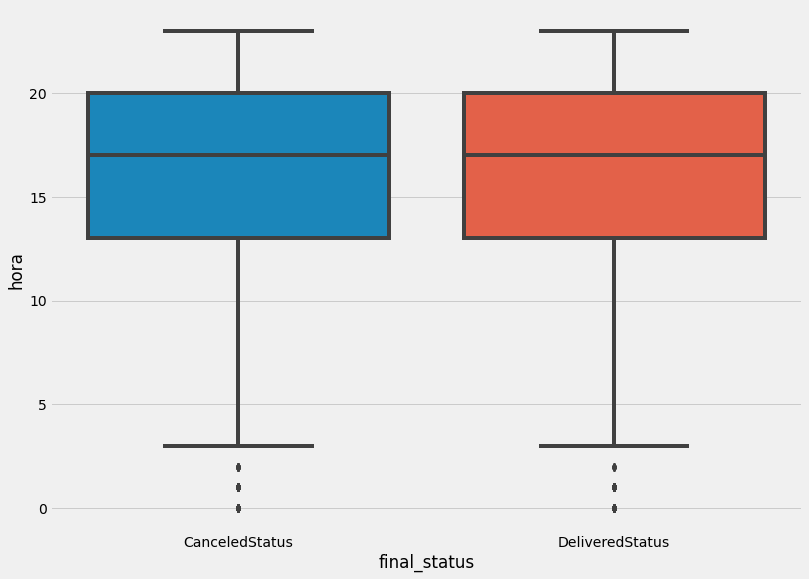

In [ ]:
_ = sns.boxplot(data=df,y='hora', x='final_status')

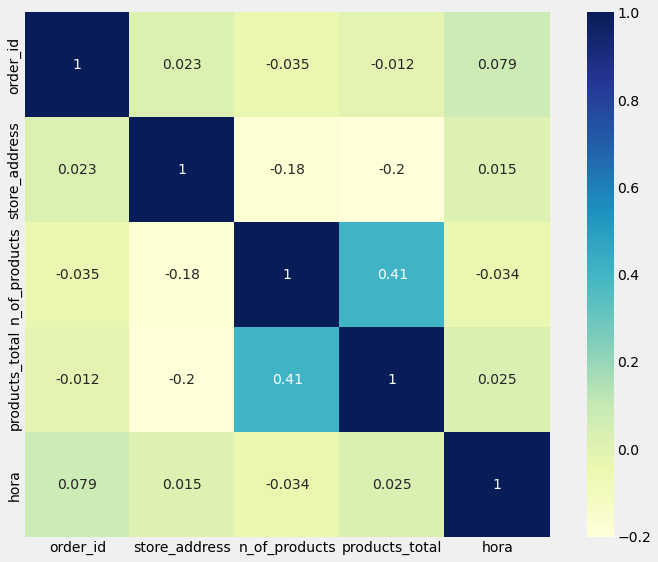

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", square=True)

In [ ]:
df.final_status.value_counts()
df['final_status_bi'] = pd.factorize(df.final_status,sort=True)[0]

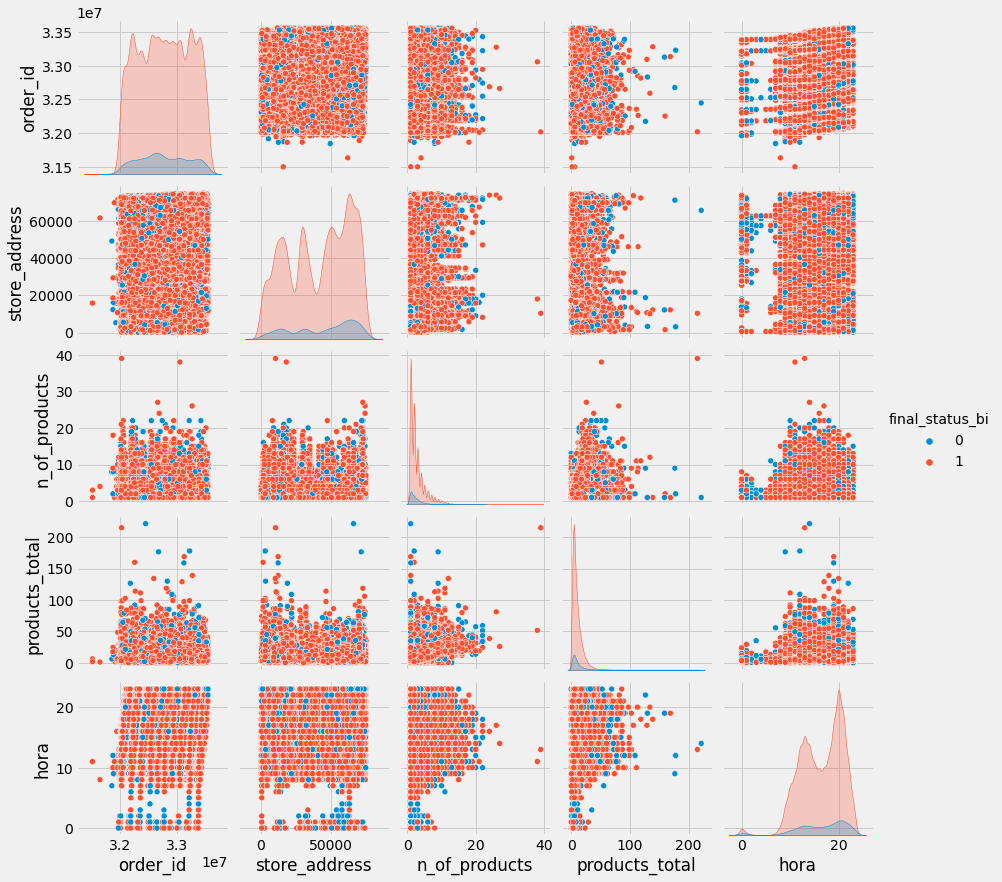

In [ ]:
_ = sns.pairplot(df,hue='final_status_bi')

### 1 ¿Cuáles son los 3 paises en los que más pedidos se realizan?

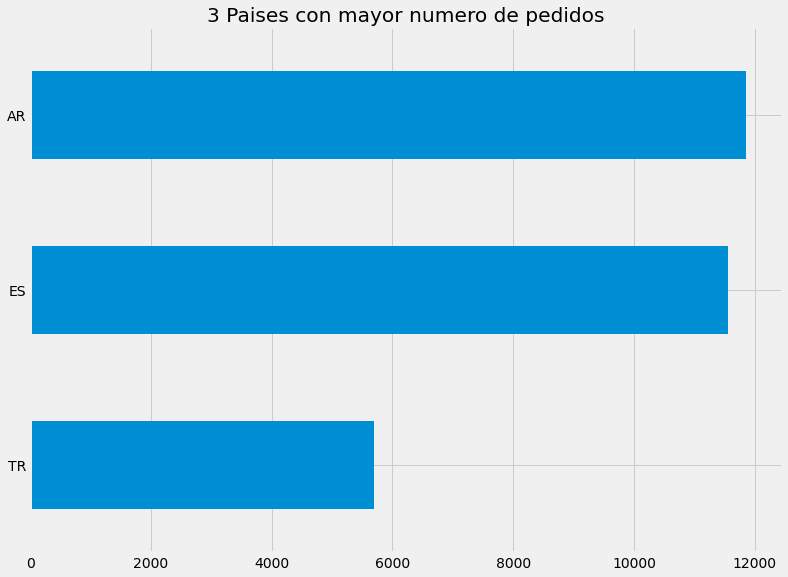

In [ ]:
df.country_code.value_counts()[:3].sort_values().plot(kind='barh',title='3 Paises con mayor numero de pedidos')

### 2 ¿Cuáles son las horas en las que se realizan más pedidos en España?

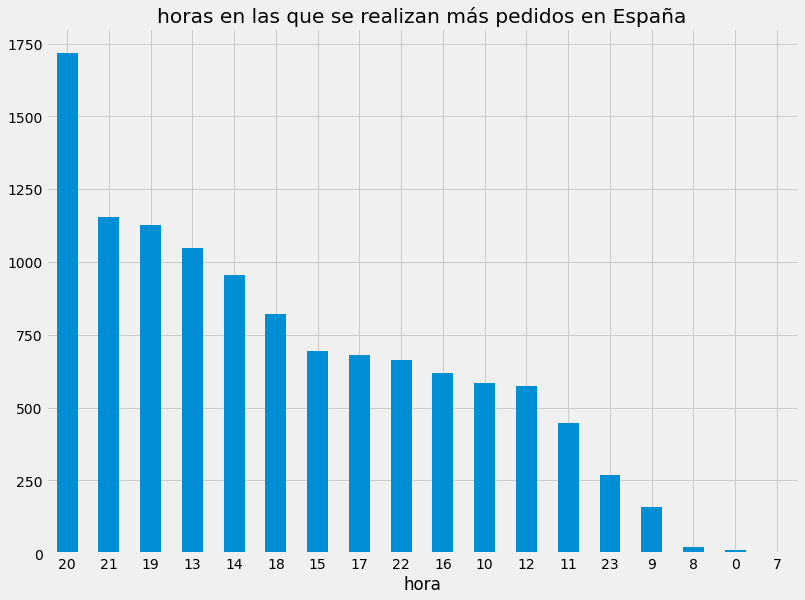

In [ ]:
_ = df[df['country_code'] == 'ES'].hora.value_counts().plot(kind='bar', title='horas en las que se realizan más pedidos en España')
_ = plt.xticks(rotation=0)
_ = plt.xlabel('hora')

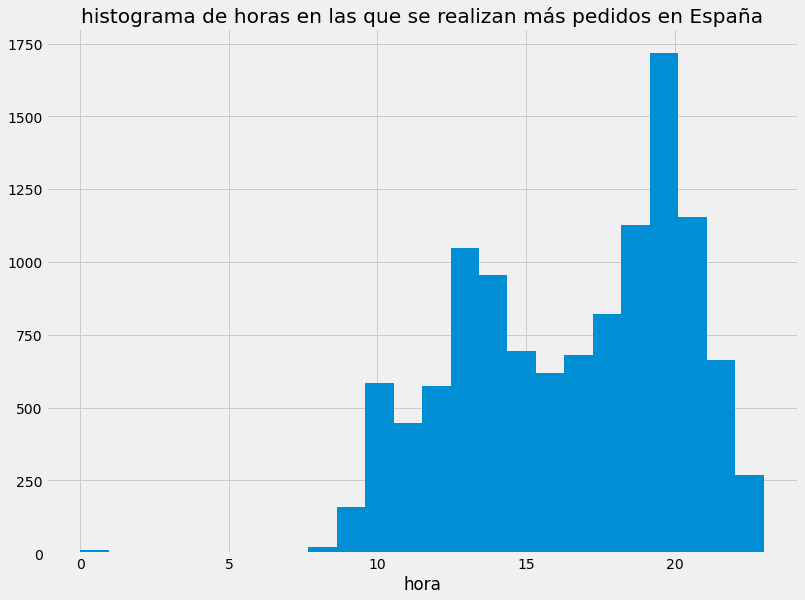

In [ ]:
_ = df[df['country_code'] == 'ES'].hora.sort_values().hist(bins=24)
_ = plt.title('histograma de horas en las que se realizan más pedidos en España')
_ = plt.xlabel('hora')

Como se puede ver 

### 3 ¿Cuál es el precio medio por pedido en la tienda con ID 12513?

In [ ]:
print('El precio medio por pedido es de {} euros'.format(round(df.query('store_address == 12513').products_total.mean(),2)))

El precio medio por pedido es de 17.39 euros


# 4 Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.


*   Turno 1 (00:00-08:00)
*   Turno 2 (08:00-16:00)
*   Turno 3 (16:00-00:00)


Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda. (ej: Turno 1 el 30%, Turno 2 el 10% y Turno 3 el 60%).

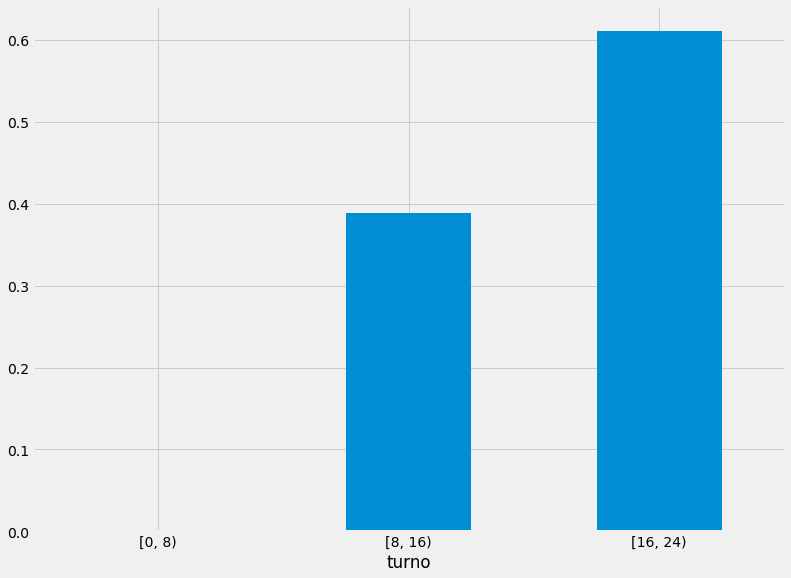

In [ ]:
# serializamos la variable numerica
df['turno'] = pd.cut(df.hora, [0,8,16,24], right=False)
_ = df[df['country_code'] == 'ES'].turno.value_counts(normalize=True).sort_values().plot(kind='bar')
_ = plt.xticks(rotation=0)
_ = plt.xlabel('turno')

Como se puede ver turno 1 el 0%, turno 2 el 40% y turno 3 el 60 %.

In [ ]:
df[df['country_code'] == 'ES'].turno.value_counts(normalize=True) * 100

[16, 24)    61.043794
[8, 16)     38.835035
[0, 8)       0.121170
Name: turno, dtype: float64

aunque si queremos cubrir todos los turnos tendria que haber 1 repartidor en el turno de la mañana, con una distribucion final de
10%, 30% y 60%
o quitar ese turno si no es muy rentable con la distribucion anterior. 

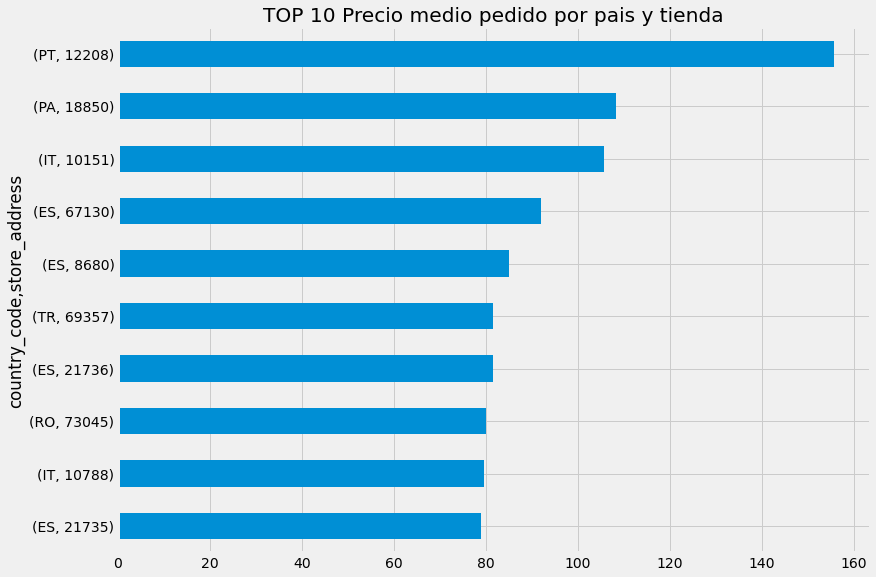

In [ ]:
df.groupby(['country_code','store_address'],observed=True).products_total.mean().sort_values(ascending=False).head(10).sort_values().plot(kind='barh',title='TOP 10 Precio medio pedido por pais y tienda')


In [ ]:
# categorical to numeric
df['turno_tri'] = pd.factorize(df.turno,sort=True)[0]
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hora,final_status_bi,turno,turno_tri
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,1,"[8, 16)",1
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,1,"[8, 16)",1
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,1,"[8, 16)",1
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,1,"[16, 24)",2
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,0,"[16, 24)",2


In [ ]:
df.query('products_total == 0')

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hora,turno,turno_tri
7113,32416264,14:44:27,AR,16568,PAID,1,0.0,CanceledStatus,14,"[8, 16)",1
36310,32401828,13:10:27,AR,16568,PAID,1,0.0,CanceledStatus,13,"[8, 16)",1
53779,32759269,21:02:05,AR,16568,PAID,2,0.0,DeliveredStatus,21,"[16, 24)",2




puede ser outlier un pedido por el que se ha pagado 0 euros

In [ ]:
df.query('store_address == 16568')

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hora,turno,turno_tri
7113,32416264,14:44:27,AR,16568,PAID,1,0.00,CanceledStatus,14,"[8, 16)",1
28478,32149378,20:37:09,AR,16568,PAID,1,6.10,DeliveredStatus,20,"[16, 24)",2
36310,32401828,13:10:27,AR,16568,PAID,1,0.00,CanceledStatus,13,"[8, 16)",1
51651,33450966,14:37:25,AR,16568,PAID,1,5.48,CanceledStatus,14,"[8, 16)",1
53779,32759269,21:02:05,AR,16568,PAID,2,0.00,DeliveredStatus,21,"[16, 24)",2


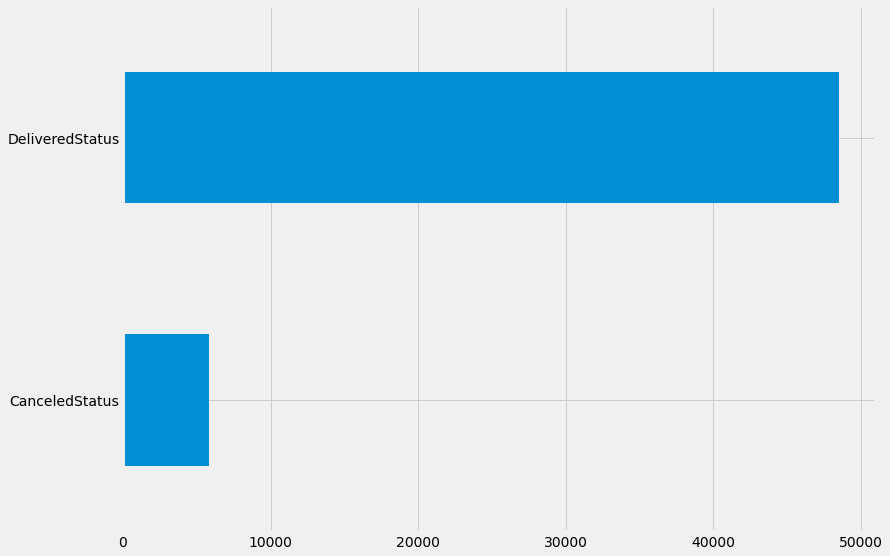

In [ ]:
df.final_status.value_counts().sort_values().plot(kind='barh')

hay desbalanceo de clases. No sera capaz de detectar correctamente los casos de pedidos cancelados.

###5 Realiza un modelo predictivo de machine learning a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status').


División de los datos en conjuntos separados de entrenamiento y test

In [ ]:
# serializamos la variable numerica
df['n_of_products_group'] = pd.cut(df.n_of_products, bins=8, right=False)
df['n_of_products_group_fi'] = pd.factorize(df.n_of_products_group,sort=True)[0]
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hora,final_status_bi,turno,turno_tri,n_of_products_group,n_of_products_group_fi
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,1,"[8, 16)",1,"[1.0, 5.75)",0
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,1,"[8, 16)",1,"[1.0, 5.75)",0
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,1,"[8, 16)",1,"[1.0, 5.75)",0
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,1,"[16, 24)",2,"[5.75, 10.5)",1
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,0,"[16, 24)",2,"[1.0, 5.75)",0


In [ ]:
df_2 = df.drop(columns=['final_status','order_id','local_time', 'turno','hora','n_of_products_group','n_of_products'])#turno_tri
df_2.head()

,country_code,store_address,payment_status,products_total,final_status_bi,turno_tri,n_of_products_group_fi
0,AR,55379,PAID,11.88,1,1,0
1,GT,23487,PAID,5.20,1,1,0
2,CR,62229,PAID,6.03,1,1,0
3,ES,29446,PAID,6.37,1,2,1
4,AR,13917,PAID,5.36,0,2,0


In [ ]:
# NUMERIC = ['store_address','n_of_products', 'products_total', '']
LABELS = ['country_code','payment_status']
df_3 = pd.get_dummies(df[LABELS])
df_2.drop(columns=['country_code','payment_status'],inplace=True)
df_new = df_2.join(df_3)

In [ ]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df_2.drop(columns='final_status_bi'),
                                        df_2['final_status_bi'],
                                        random_state = 123,
                                        stratify=df_2['final_status_bi']
                                    )

Matriz de confusión
-------------------


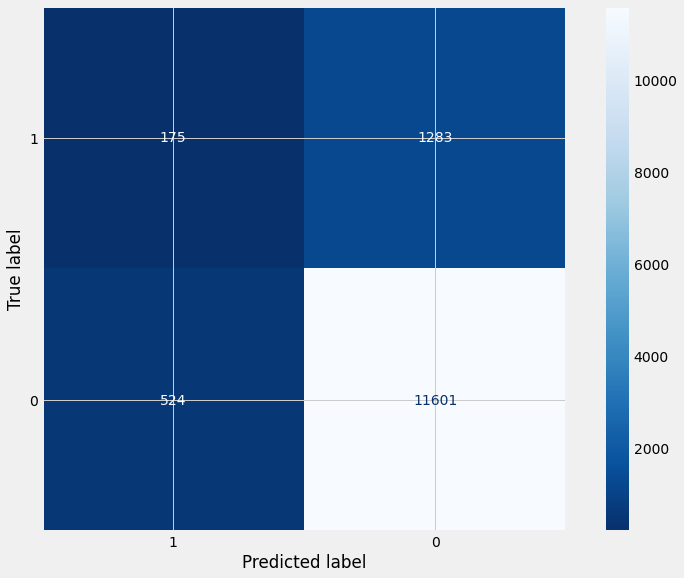


El accuracy de test es: 54.500420645971246 %


In [ ]:
forest = RandomForestClassifier(class_weight='balanced', random_state = 123)
modelF = forest.fit(X_train, y_train)
predicciones = modelF.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.25      0.12      0.16      1458
           1       0.90      0.96      0.93     12125

    accuracy                           0.87     13583
   macro avg       0.58      0.54      0.55     13583
weighted avg       0.83      0.87      0.85     13583



In [ ]:
n_estimators = [20, 50, 100, 300, 500, 800]
max_depth = [2, 5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 10]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'n_estimators',
                                param_range = n_estimators, cv = 3)

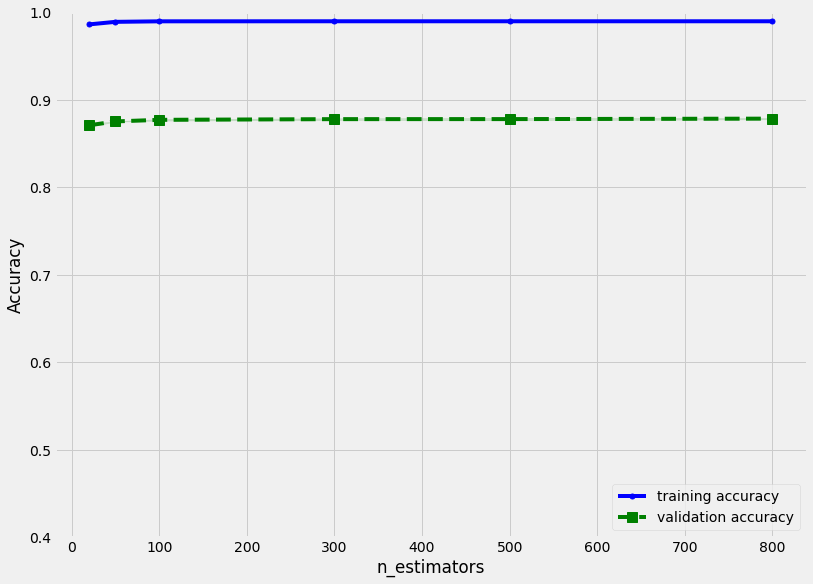

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(n_estimators, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(n_estimators, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(n_estimators, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(n_estimators,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.0])
plt.show()

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'max_depth',
                                param_range = max_depth, cv = 3)

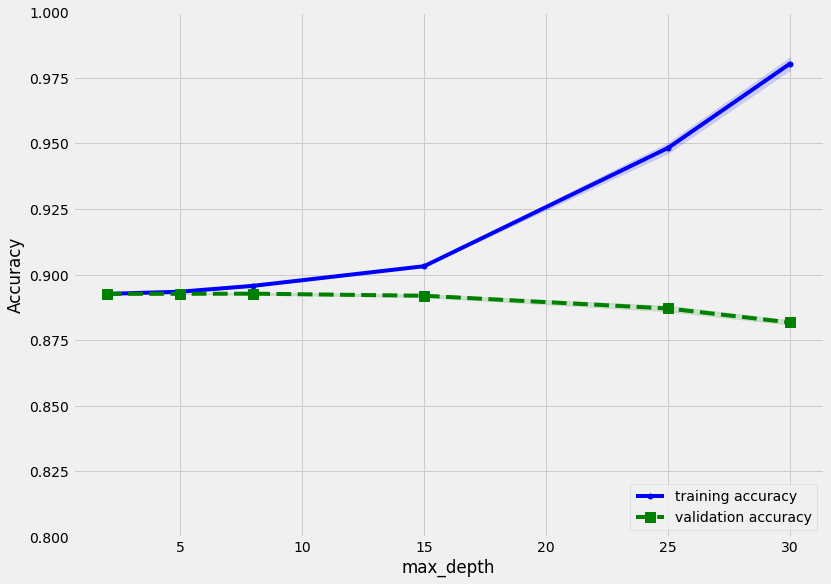

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(max_depth, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(max_depth, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(max_depth, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(max_depth,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_split',
                                param_range = min_samples_split, cv = 3)

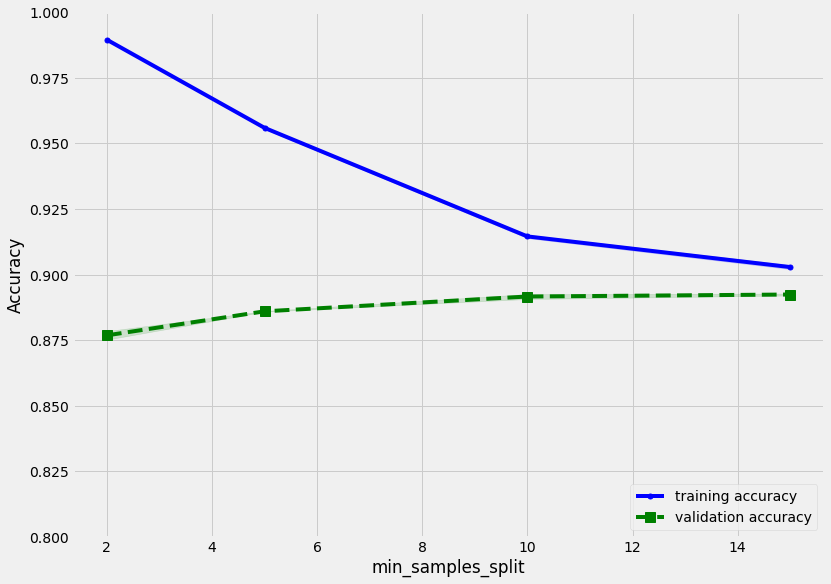

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(min_samples_split, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(min_samples_split, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(min_samples_split, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(min_samples_split,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_leaf',
                                param_range = min_samples_leaf, cv = 3)

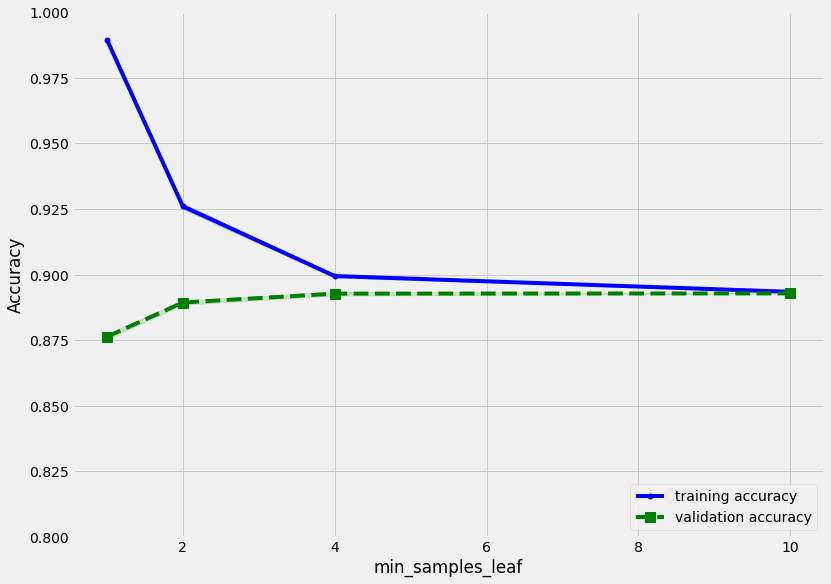

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(min_samples_leaf, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(min_samples_leaf, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(min_samples_leaf, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(min_samples_leaf,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

Matriz de confusión
-------------------


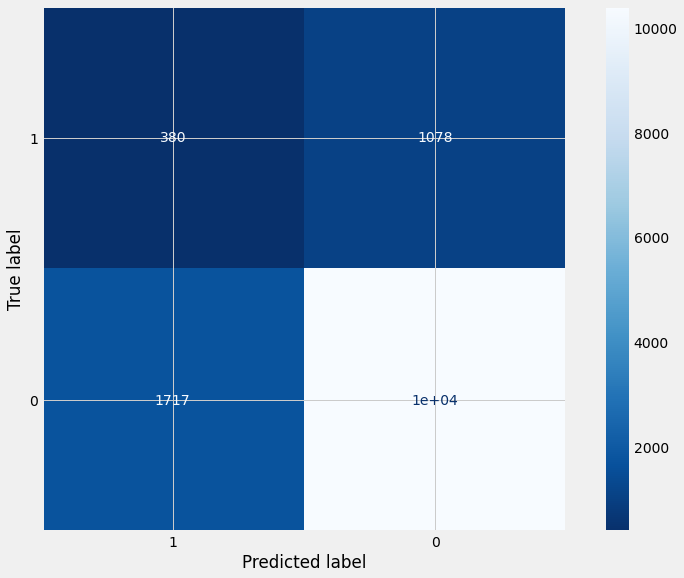


El accuracy de test es: 54.77031880001104 %


In [ ]:
forestVC = RandomForestClassifier(random_state = 123,
                                  n_estimators = 300,
                                  max_depth = 15, 
                                  min_samples_split = 2,  
                                  min_samples_leaf = 2,
                                  class_weight='balanced') 
modelVC = forestVC.fit(X_train, y_train) 
predicciones = modelVC.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.18      0.26      0.21      1458
           1       0.91      0.86      0.88     12125

    accuracy                           0.79     13583
   macro avg       0.54      0.56      0.55     13583
weighted avg       0.83      0.79      0.81     13583



Intentamos ajustar el umbral para mejorar la precision

In [ ]:
y_pred_proba = modelVC.predict_proba(X_test)
y_pred_proba[:5,:]

array([[0.41385515, 0.58614485],
       [0.36189769, 0.63810231],
       [0.47352137, 0.52647863],
       [0.34359195, 0.65640805],
       [0.45326972, 0.54673028]])

In [ ]:
df_predicciones = pd.DataFrame(data=y_pred_proba, columns=['0', '1'])
df_predicciones['clasificacion_custom'] = np.where(df_predicciones['0'] > 0.54, 0, 1)
df_predicciones.head(3)

,0,1,clasificacion_custom
0,0.413855,0.586145,1
1,0.361898,0.638102,1
2,0.473521,0.526479,1


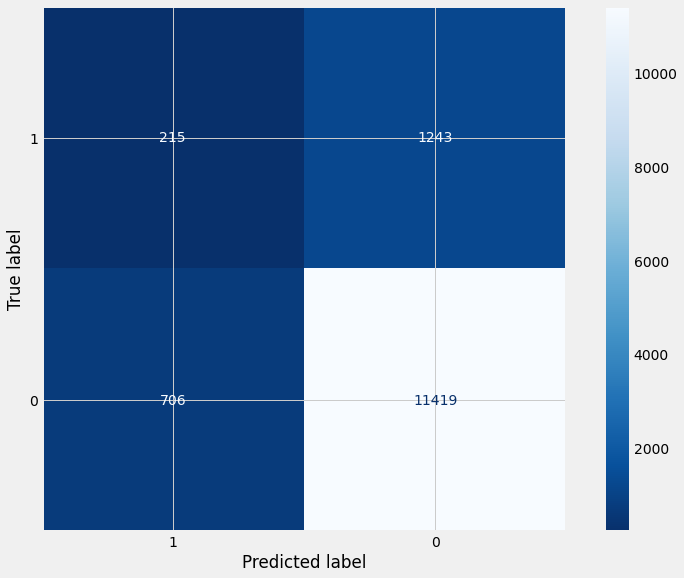

In [ ]:
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = df_predicciones['clasificacion_custom']
                )
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = df_predicciones['clasificacion_custom']
    )
)

              precision    recall  f1-score   support

           0       0.23      0.15      0.18      1458
           1       0.90      0.94      0.92     12125

    accuracy                           0.86     13583
   macro avg       0.57      0.54      0.55     13583
weighted avg       0.83      0.86      0.84     13583



no se consigue mejorar mucho mas 

Matriz de confusión
-------------------


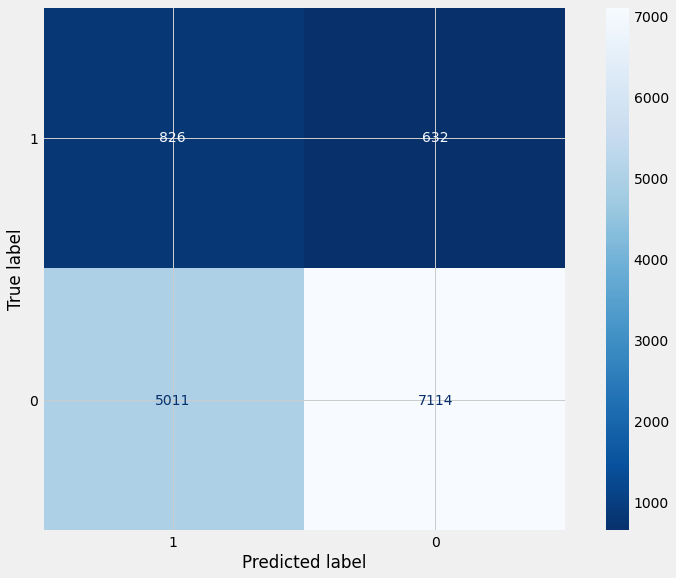


El accuracy de test es: 47.12373975955744 %


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier 

# bbc = BalancedRandomForestClassifier(sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=123)
bbc = BalancedRandomForestClassifier(random_state = 123,
                                  n_estimators = 500,
                                  max_depth = 15, 
                                  min_samples_split = 2, 
                                  min_samples_leaf = 2,
                                  class_weight='balanced_subsample') 
#Train the classifier.
bbc.fit(X_train, y_train)
predicciones = bbc.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.14      0.57      0.23      1458
           1       0.92      0.59      0.72     12125

    accuracy                           0.58     13583
   macro avg       0.53      0.58      0.47     13583
weighted avg       0.84      0.58      0.66     13583



Subsampling 

In [ ]:
from imblearn.under_sampling import NearMiss 
from collections import Counter
us = NearMiss(n_neighbors=3, version=3)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 

Distribution before resampling Counter({1: 36373, 0: 4374})
Distribution after resampling Counter({0: 4374, 1: 4374})


Matriz de confusión
-------------------


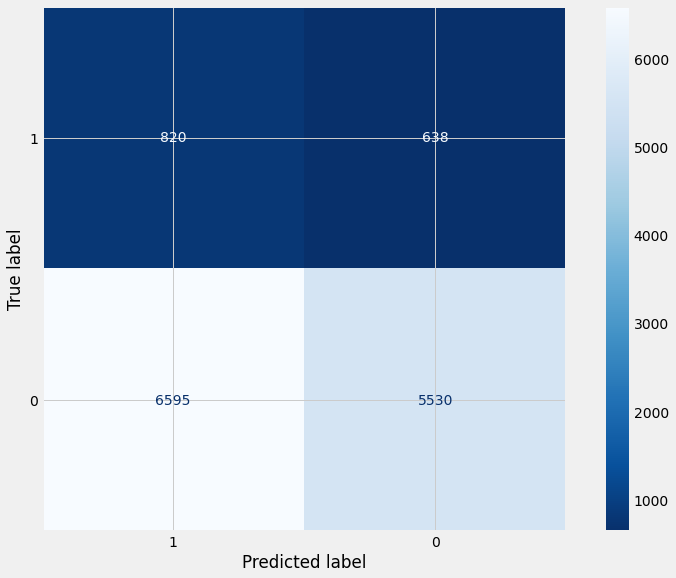


El accuracy de test es: 39.471661893124804 %


In [ ]:
forestVC = RandomForestClassifier(random_state = 123,
                                  n_estimators = 300,
                                  max_depth = 15, 
                                  min_samples_split = 2,  
                                  min_samples_leaf = 2,
                                  class_weight='balanced') 
modelVC = forestVC.fit(X_train_res, y_train_res) 
predicciones = modelVC.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.11      0.56      0.18      1458
           1       0.90      0.46      0.60     12125

    accuracy                           0.47     13583
   macro avg       0.50      0.51      0.39     13583
weighted avg       0.81      0.47      0.56     13583



Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler 

os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))
 

Distribution before resampling Counter({1: 36373, 0: 4374})
Distribution labels after resampling Counter({1: 36373, 0: 36373})


Matriz de confusión
-------------------


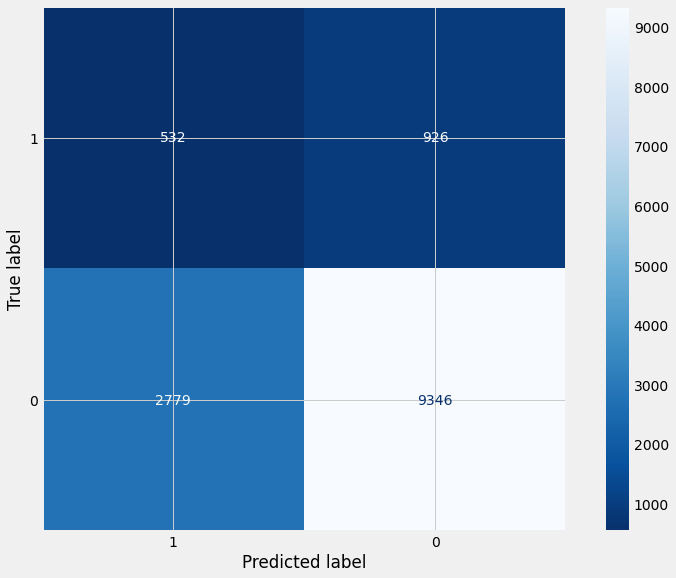


El accuracy de test es: 52.884181450738545 %


In [ ]:
forestVC = RandomForestClassifier(random_state = 123,
                                  n_estimators = 300,
                                  max_depth = 15, 
                                  min_samples_split = 2,  
                                  min_samples_leaf = 2,
                                  class_weight='balanced') 
modelVC = forestVC.fit(X_train_res, y_train_res) 
predicciones = modelVC.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.16      0.36      0.22      1458
           1       0.91      0.77      0.83     12125

    accuracy                           0.73     13583
   macro avg       0.54      0.57      0.53     13583
weighted avg       0.83      0.73      0.77     13583



Tampoco conseguimos mejorar el modelo mediante tecnicas de aumento y reduccion de datos de clases desequilibradas.

### Aplicamos redes neuronales 

In [ ]:
from tensorflow.keras.utils import to_categorical

df_3 = df.drop(columns=['order_id','local_time','n_of_products_group','n_of_products_group_fi', 'turno','final_status','hora'])
X = df_3.drop(columns='final_status_bi')
y = df_3.final_status_bi

# df_3['store_address'] = pd.Categorical(df_3.store_address)
# df_3['hora'] = pd.Categorical(df_3.hora)

response = pd.Categorical(y.values.reshape(-1))
y = to_categorical(response.codes)

X['country_code'] = pd.factorize(X.country_code,sort=True)[0]
X['payment_status'] = pd.factorize(X.payment_status,sort=True)[0]

In [ ]:
df_3.head()

,country_code,store_address,payment_status,n_of_products,products_total,final_status_bi,turno_tri
0,AR,55379,PAID,2,11.88,1,1
1,GT,23487,PAID,2,5.20,1,1
2,CR,62229,PAID,1,6.03,1,1
3,ES,29446,PAID,6,6.37,1,2
4,AR,13917,PAID,1,5.36,0,2


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = df_3.drop(columns='final_status_bi').select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = df_3.drop(columns='final_status_bi').select_dtypes(include=['float64', 'int']).columns.to_list()

# # Se aplica one-hot-encoding solo a las columnas categóricas
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)],remainder='passthrough')

# X_train_trans = columnTransformer.fit_transform(X_train)
# X_test_trans = columnTransformer.transform(X_test)
X_tr = columnTransformer.fit_transform(X)

# cat_cols
# numeric_cols


In [ ]:
X_tr.shape

(54330, 30)

In [ ]:
# convertimos el output array del columnTransformer en dataframe y añadimos el nombre de las columnas
encoded_cat = columnTransformer.named_transformers_['encoder'].get_feature_names_out(cat_cols)
col_names = np.concatenate([encoded_cat,numeric_cols])

# Conversión a dataframe
# X_train_trans = pd.DataFrame(X_train_trans, columns=col_names)
# X_test_trans  = pd.DataFrame(X_test_trans, columns=col_names)


X_tr = pd.DataFrame(X_tr.toarray(),columns=col_names)
# X_tr.drop(columns=['country_code_0','payment_status_0','store_address_55379', 'hora_0'], inplace=True)
X_tr.drop(columns=['country_code_0','payment_status_0'], inplace=True)
X_tr.info()
#X_train_trans[0:2,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code_1    54330 non-null  float64
 1   country_code_2    54330 non-null  float64
 2   country_code_3    54330 non-null  float64
 3   country_code_4    54330 non-null  float64
 4   country_code_5    54330 non-null  float64
 5   country_code_6    54330 non-null  float64
 6   country_code_7    54330 non-null  float64
 7   country_code_8    54330 non-null  float64
 8   country_code_9    54330 non-null  float64
 9   country_code_10   54330 non-null  float64
 10  country_code_11   54330 non-null  float64
 11  country_code_12   54330 non-null  float64
 12  country_code_13   54330 non-null  float64
 13  country_code_14   54330 non-null  float64
 14  country_code_15   54330 non-null  float64
 15  country_code_16   54330 non-null  float64
 16  country_code_17   54330 non-null  float6

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [ ]:
# def create_model():
#   model = Sequential()
#   model.add(Dense(64, activation='relu',input_dim=28))
#   model.add(Dense(32, activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(8,activation='relu'))
#   model.add(Dense(2,activation='softmax'))
#   return model

def create_model():
  model = Sequential()
  model.add(Dense(15, activation='relu',input_dim=28))
  model.add(Dense(15, activation='relu'))
  # model.add(Dense(7,activation='relu'))
  # model.add(Dense(8,activation='relu'))
  model.add(Dense(2,activation='softmax'))
  return model

model = create_model()
model.summary()

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                435       
                                                                 
 dense_25 (Dense)            (None, 15)                240       
                                                                 
 dense_26 (Dense)            (None, 2)                 32        
                                                                 
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train_x, test_x, train_y, test_y = train_test_split(X_tr, y, test_size=0.2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(
                                        X_tr,
                                        y,
                                        test_size=0.2,
                                        random_state = 123,
                                        stratify=y
                                    )

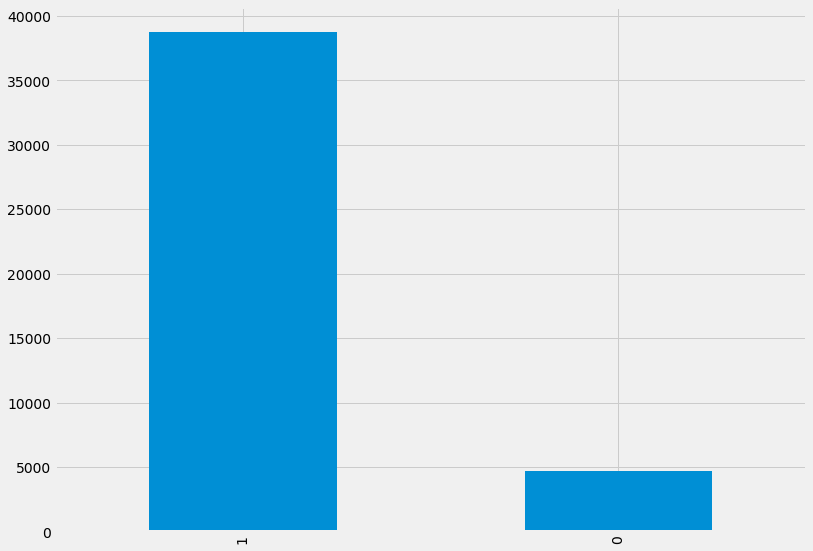

In [ ]:
pd.value_counts(y_train.argmax(axis=1)).plot(kind='bar')

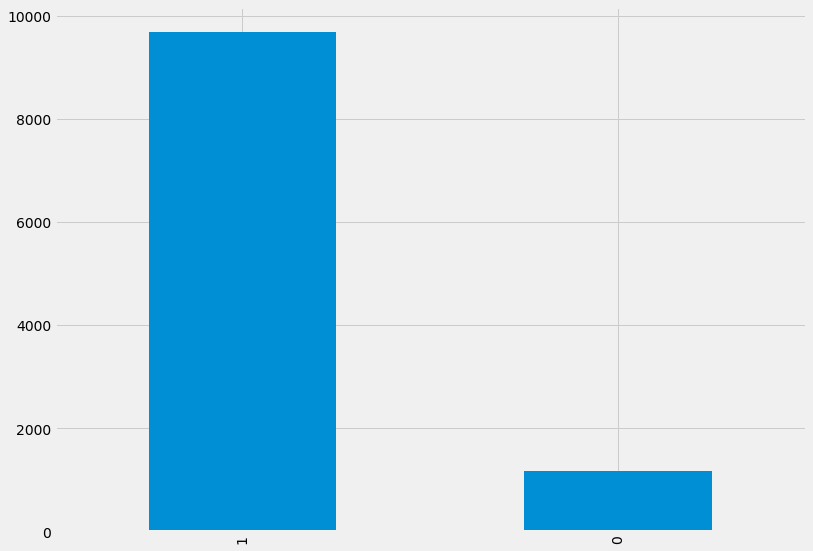

In [ ]:
pd.value_counts(y_test.argmax(axis=1)).plot(kind='bar')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# sns.histplot(X_train[0])

In [ ]:
print('Dimension conjunto de test :{}, tipo de dato: {}'.format(X_train.shape,X_train.dtype))

Dimension conjunto de test :(43464, 28), tipo de dato: float64


In [ ]:
print('Dimension conjunto de test :{}, tipo de dato: {}'.format(y_train.shape,y_train.dtype))

Dimension conjunto de test :(43464, 2), tipo de dato: float32


In [ ]:
print('Dimension conjunto de test :{}, tipo de dato: {}'.format(X_test.shape,X_test.dtype))

Dimension conjunto de test :(10866, 28), tipo de dato: float64


In [ ]:
print('Dimension conjunto de test :{}, tipo de dato: {}'.format(y_test.shape,y_test.dtype))

Dimension conjunto de test :(10866, 2), tipo de dato: float32


In [ ]:
import timeit
batch_size = [32,64,128,256,512]
results = {}
tiempo = {}
for batch in batch_size:
  start_time = timeit.default_timer()
  model = create_model()
  model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
  history = model.fit(X_train,y_train,epochs=20,batch_size=batch,validation_data=(X_test,y_test),verbose=0)
  results[batch] = history
  tiempo[batch] = (timeit.default_timer() - start_time)
results

{32: <keras.callbacks.History at 0x7f63d82f1710>,
 64: <keras.callbacks.History at 0x7f63dfd77c50>,
 128: <keras.callbacks.History at 0x7f63eb202410>,
 256: <keras.callbacks.History at 0x7f63e5be2590>,
 512: <keras.callbacks.History at 0x7f63eb515ad0>}

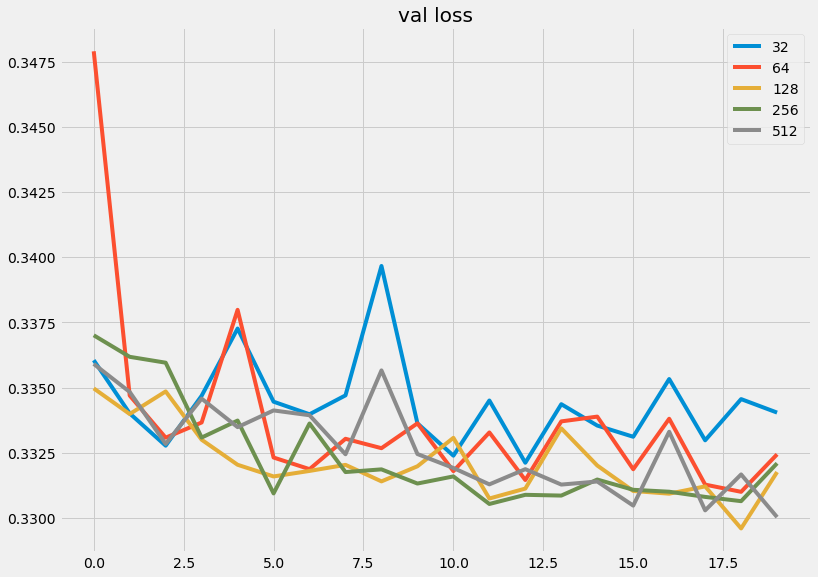

In [ ]:
val_loss_batch = { k:v.history['val_loss'] for k,v in results.items()}

val_loss = pd.DataFrame(val_loss_batch)
val_loss.plot(title='val loss')

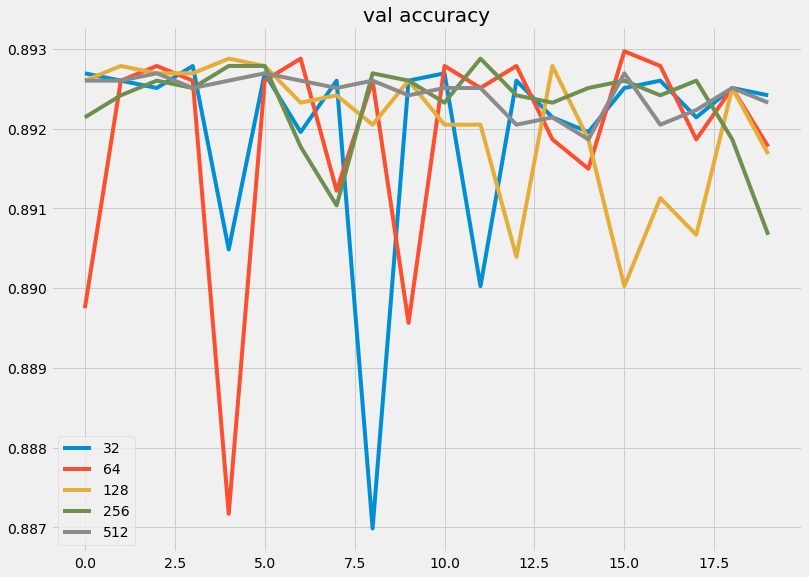

In [ ]:
val_accuracy_batch = { k:v.history['val_accuracy'] for k,v in results.items()}

val_accuracy = pd.DataFrame(val_accuracy_batch)
val_accuracy.plot(title='val accuracy')

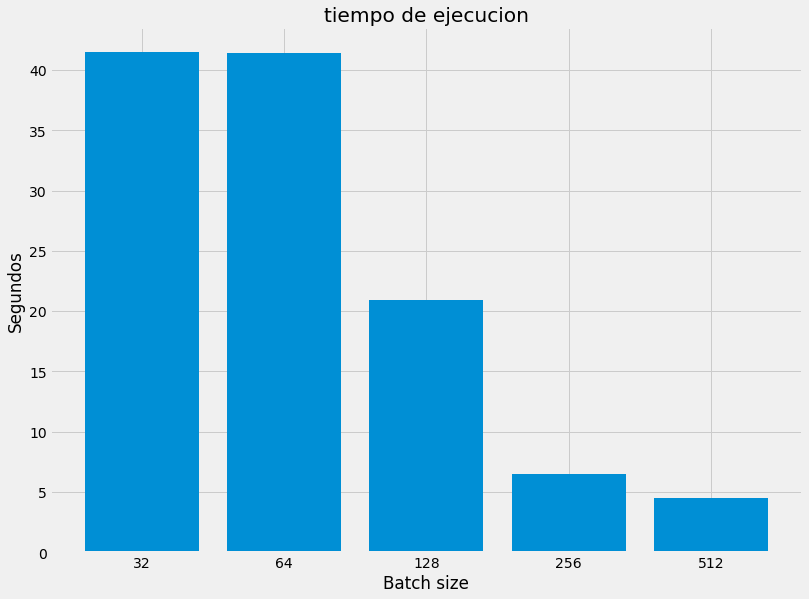

In [ ]:
names = list(tiempo.keys())
values = list(tiempo.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(tiempo)),values,tick_label=names)
plt.title('tiempo de ejecucion')
plt.xlabel('Batch size')
plt.ylabel('Segundos')
# plt.savefig('bar.png')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True,verbose=1)

model = create_model()
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,batch_size=512,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/20
85/85 [==============================] - 1s 4ms/step - loss: 0.3550 - accuracy: 0.8901 - val_loss: 0.3400 - val_accuracy: 0.8927
Epoch 2/20
85/85 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8927 - val_loss: 0.3363 - val_accuracy: 0.8928
Epoch 3/20
85/85 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8929 - val_loss: 0.3341 - val_accuracy: 0.8929
Epoch 4/20
85/85 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8927 - val_loss: 0.3338 - val_accuracy: 0.8928
Epoch 5/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8930 - val_loss: 0.3339 - val_accuracy: 0.8930
Epoch 6/20
85/85 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8928 - val_loss: 0.3353 - val_accuracy: 0.8926
Epoch 7/20
85/85 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8929 - val_loss: 0.3339 - val_accuracy: 0.8931
Epoch 8/20
85/85 [==

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.09847853, 0.9015215 ],
       [0.09715253, 0.90284747],
       [0.05932704, 0.94067293],
       ...,
       [0.14953476, 0.85046524],
       [0.08972465, 0.91027534],
       [0.08422013, 0.9157799 ]], dtype=float32)

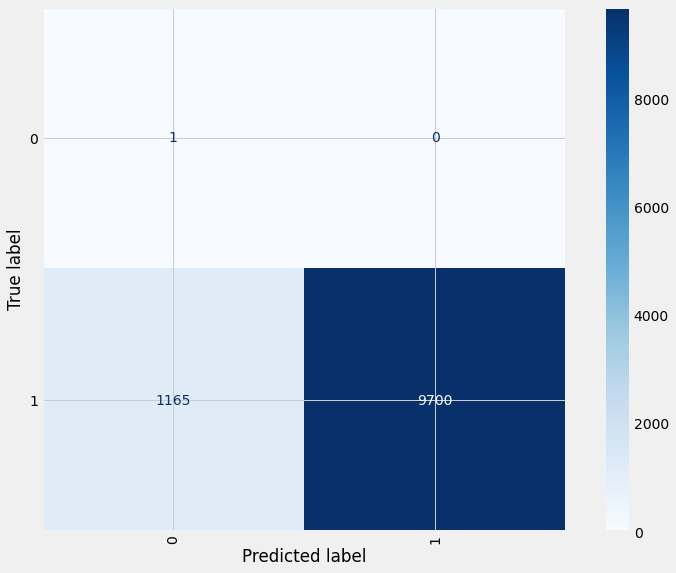

In [ ]:
cm=confusion_matrix(y_pred.argmax(axis=1),y_test.argmax(axis=1))
ls=response.categories

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ls)

# sns.heatmap(disp.confusion_matrix,annot=True,cmap='Blues',square=True,fmt='d')
disp.plot(include_values=True, cmap='Blues',values_format='d',xticks_rotation='vertical')
plt.show()

In [ ]:
print('Accuracy: {}'.format(accuracy_score(y_pred.argmax(axis=1),y_test.argmax(axis=1))))
print(classification_report(y_pred.argmax(axis=1),y_test.argmax(axis=1)))

Accuracy: 0.8927848334253635
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       1.00      0.89      0.94     10865

    accuracy                           0.89     10866
   macro avg       0.50      0.95      0.47     10866
weighted avg       1.00      0.89      0.94     10866



El modelo empeora.

#Guardamos datos 

Recuperamos el mejor modelo obtenido y guardamos los datos de la predicción

Matriz de confusión
-------------------


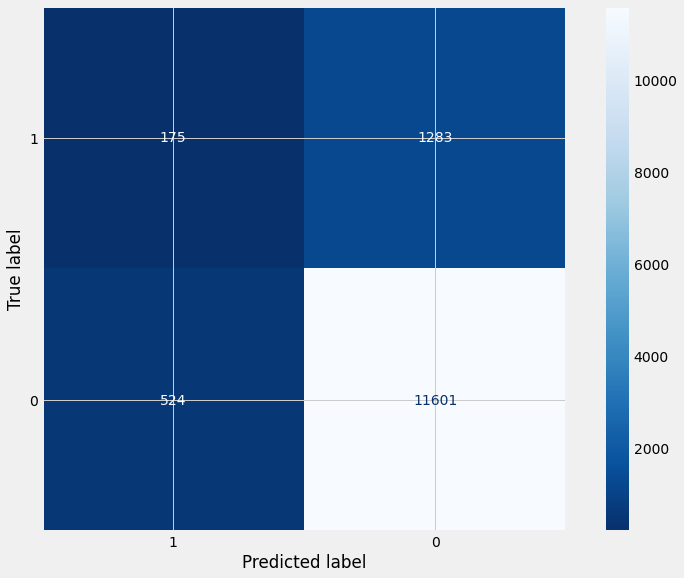


El accuracy de test es: 54.500420645971246 %


In [ ]:
forest = RandomForestClassifier(class_weight='balanced', random_state = 123)
modelF = forest.fit(X_train, y_train)
predicciones = modelF.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.25      0.12      0.16      1458
           1       0.90      0.96      0.93     12125

    accuracy                           0.87     13583
   macro avg       0.58      0.54      0.55     13583
weighted avg       0.83      0.87      0.85     13583



In [107]:
# guardamos los datos de la prediccion del mejor modelo en un csv
df_res = pd.DataFrame(predicciones,columns=['final_status'])
df_res.to_csv('predicciones.csv',index=None)